In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn import preprocessing

In [8]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [13]:
%matplotlib inline
sns.set(font_scale=1.5)

In [3]:
df = pd.read_csv('banking.csv')

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [9]:
df.shape

(41188, 21)

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


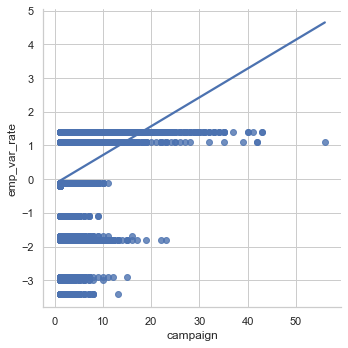

In [12]:
sns.lmplot(x='campaign', y = 'emp_var_rate', data = df, ci = None)

In [14]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [15]:
df['education'] = np.where(df['education'] == 'basic.9y', 'basic',df['education'])

In [16]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school', 'basic',
       'professional.course', 'basic.6y', 'illiterate'], dtype=object)

In [17]:
df['education'] = np.where(df['education'] == 'basic.4y', 'basic',df['education'])
df['education'] = np.where(df['education'] == 'basic.6y', 'basic',df['education'])

In [18]:
df['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [20]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

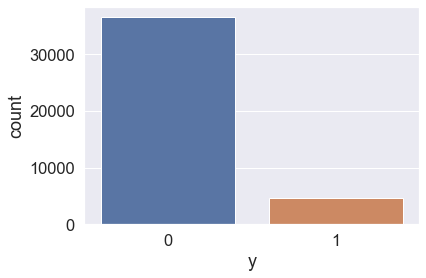

In [21]:
sns.countplot(df['y'])

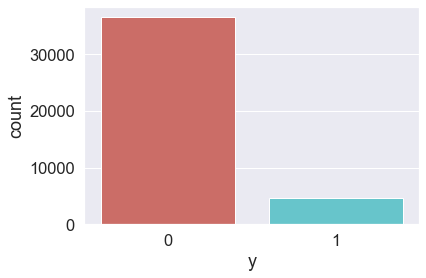

In [22]:
sns.countplot(x='y', data= df,palette = 'hls')

In [23]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [24]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


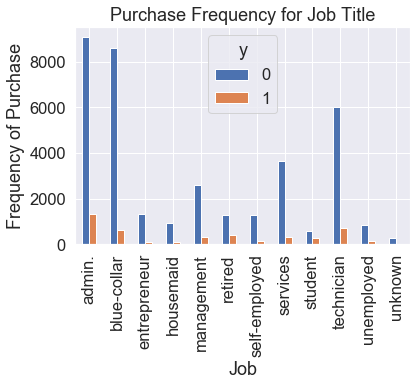

In [25]:
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [27]:
cat_vars = ['job','marital','education','default','housing', 'loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    
    cat_list = pd.get_dummies(df[var],prefix = var)
    df1 = df.join(cat_list)
    df = df1

In [28]:
df.shape

(41188, 72)

In [30]:
data_vars = df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [31]:
data_final = df[to_keep]
data_final.columns.values
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [32]:
df = data_final

In [33]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [34]:
logreg = LogisticRegression()

In [35]:
df_final_vars = df.columns.values.tolist()

In [40]:
y = ['y']
x = [i for i in df_final_vars if i not in y]

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
rfe = RFE(logreg,18)
rfe = rfe.fit(df[x],df[y])

In [43]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True, False, False,
        True, False, False, False,  True, False,  True])

In [45]:
rfe.ranking_

array([32, 30, 10, 35,  1, 15, 20, 16,  1, 23,  8,  1, 24, 36, 39,  1, 40,
        1,  1,  9, 26, 42, 31, 21, 12, 44, 18, 19, 41, 14,  4,  1,  1, 17,
       43, 34, 37, 25, 13, 38, 29,  5,  1,  1,  1, 33, 11,  3,  1,  1,  1,
        1, 27, 22,  1,  7,  6,  2,  1, 28,  1])

In [46]:
cols= ["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success"]

In [47]:
X = df[cols]

In [48]:
X.head()

,previous,euribor3m,job_blue-collar,job_retired,job_services,job_student,default_no,month_aug,month_dec,month_jul,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,4.963,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,4.021,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
2,2,0.729,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.405,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,1,0.869,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1


In [49]:
X.shape

(41188, 18)

In [50]:
Y = df['y']

In [51]:
Y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [53]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [54]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred = logreg.predict(x_test)

In [56]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
logreg.score(x_test,y_test)

0.9004612770089827

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix = confusion_matrix(y_test,y_pred)

In [61]:
confusion_matrix

array([[10872,   109],
       [ 1121,   255]], dtype=int64)